In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000
# np.random.uniform(low, high, size): draws a random value from the interval, where each number has an equal chance to be selected.

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# np.column_stack(tuples): takes a sequence of 1d arrays and stacks them into a single 2d array.

g_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))
g_targets = 2*xs - 3*zs + 5 + noise

In [3]:
## The above cell is same (previous notebook).

In [4]:
np.savez('TF_intro', inputs=g_inputs, targets=g_targets)

In [5]:
### .npz files are ndarray data file. Tensorflow works best with ndarrays(tensors)
### np.savez(file-name, array): saves ndarray in .npz format, using certain keyword (label) for each array

#### Tensorflow: Outlining the model

In [6]:
training_data = np.load('TF_intro.npz') # it's good to load data from npz.(Right Practice)

In [7]:
input_size = 2 # as there are 2 input variables
output_size = 1

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

### tf.keras.Sequential(): specifies how the model will be laid down. ('stack layers')
### Linear combination + outputs = Layer
# tf.keras.layers.Dense(): method takes the provided inputs and calculates the dot product of the inputs and weights and adds the bias.

In [9]:
### model.compile(optimizer, loss): configures the model for training
model.compile(optimizer='sgd', loss='mean_squared_error')

# Check tensorflow documentation for optimizers

In [10]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 311us/sample - loss: 20.8714
Epoch 2/100
1000/1000 [==============================] - 0s 38us/sample - loss: 4.2971
Epoch 3/100
1000/1000 [==============================] - 0s 40us/sample - loss: 1.4266
Epoch 4/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.6362
Epoch 5/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.4251
Epoch 6/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.3682
Epoch 7/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.3551
Epoch 8/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.3548
Epoch 9/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.3447
Epoch 10/100
1000/1000 [==============================] - 0s 39us/sample - loss: 0.3473
Epoch 11/100
1000/1000 [==============================] - 0s 35us/sample - loss: 0.3581
Epoch 12/100
1000

Epoch 94/100
1000/1000 [==============================] - 0s 34us/sample - loss: 0.3557
Epoch 95/100
1000/1000 [==============================] - 0s 35us/sample - loss: 0.3501
Epoch 96/100
1000/1000 [==============================] - 0s 34us/sample - loss: 0.3497
Epoch 97/100
1000/1000 [==============================] - 0s 34us/sample - loss: 0.3509
Epoch 98/100
1000/1000 [==============================] - 0s 35us/sample - loss: 0.3487
Epoch 99/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.3452
Epoch 100/100
1000/1000 [==============================] - 0s 35us/sample - loss: 0.3502


In [11]:
### The loss function decreases, so our algorithm has worked as intended.

#### Extracting weights and biases

In [12]:
model.layers[0].get_weights()

[array([[ 2.0032172],
        [-3.0030377]], dtype=float32),
 array([5.027623], dtype=float32)]

In [13]:
### output contains 2 arrays, one for weights and one for bias

In [14]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0032172],
       [-3.0030377]], dtype=float32)

In [15]:
bias = model.layers[0].get_weights()[1]
bias

array([5.027623], dtype=float32)

#### Making predictions (Extract Outputs)

In [16]:
temp = model.predict_on_batch(training_data['inputs'])

In [17]:
temp.numpy().round(1)

array([[ 25.5],
       [ -9.9],
       [ 16.2],
       [-11.5],
       [  8.1],
       [  4.4],
       [ 11.8],
       [ 28.4],
       [  3.1],
       [ 25.1],
       [ 16.9],
       [  2.4],
       [ -2.7],
       [-35.7],
       [  1.1],
       [ 21.5],
       [-34.6],
       [-43.8],
       [  8. ],
       [ 51.3],
       [  9.4],
       [ 20.5],
       [-35.2],
       [-28.8],
       [  6.5],
       [-19. ],
       [-11.2],
       [  4. ],
       [-22.8],
       [ -7.1],
       [ -8.7],
       [  3.4],
       [ 38.3],
       [ 14.4],
       [ 12.3],
       [ -6. ],
       [ 14. ],
       [ 26.2],
       [ 12.1],
       [ 33.6],
       [ 16.3],
       [ -3.2],
       [ -7.8],
       [-20.1],
       [-16.2],
       [  5.6],
       [-26.8],
       [  9. ],
       [-21.2],
       [  6.4],
       [ -4.1],
       [ -9.5],
       [  1.1],
       [ 20.8],
       [ 42.3],
       [ 13.7],
       [ 38.5],
       [ -0.8],
       [ 12.9],
       [ 30.2],
       [-32.3],
       [ 17.4],
       [

In [18]:
temp1 = training_data['targets']
temp1.round(1) 

array([[ 26.4],
       [-10.5],
       [ 16.3],
       [-10.6],
       [  8.7],
       [  4.5],
       [ 11.4],
       [ 29. ],
       [  2.5],
       [ 24.2],
       [ 16.4],
       [  1.9],
       [ -2.3],
       [-34.8],
       [  1.8],
       [ 21.7],
       [-34.6],
       [-44.1],
       [  7.1],
       [ 50.4],
       [  8.6],
       [ 19.7],
       [-35.9],
       [-28.8],
       [  7.2],
       [-19.1],
       [-10.6],
       [  4.4],
       [-21.9],
       [ -7.4],
       [ -9.3],
       [  3.2],
       [ 37.9],
       [ 14. ],
       [ 11.9],
       [ -6.2],
       [ 14.1],
       [ 25.8],
       [ 11.6],
       [ 32.8],
       [ 15.5],
       [ -3.6],
       [ -7.5],
       [-19.2],
       [-15.4],
       [  4.8],
       [-27.8],
       [  9.3],
       [-21. ],
       [  6.3],
       [ -4.7],
       [ -9.8],
       [  0.6],
       [ 21.7],
       [ 42.5],
       [ 14.2],
       [ 38. ],
       [  0.1],
       [ 13.8],
       [ 30.2],
       [-32.3],
       [ 18. ],
       [

In [19]:
### We can see that the outputs and the targets are very close to each other, but not same.

#### Plotting

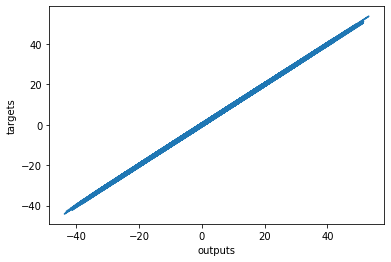

In [20]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [21]:
#### We have successfully build our first model in TF2. Although, we cannot call it DL yet.